In [130]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 


In [131]:
df = pd.read_csv('insurance.csv')

In [132]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## One-hot encoding

In [133]:
pd.get_dummies(data= df,
             columns=["sex", "smoker", "region"], # qaysi ustunni o'zgartirishini kiritish
             prefix=["jinsi", 'smoking', 'hududi'],   #columnsdagi obyekt nomini o'zgartirish 
             prefix_sep="__",   # o`rtadagi ishorani o'zgartirish`
             drop_first=True,   # K-1
             dtype="int32")  # Typeni o'zgartirish

,age,bmi,children,charges,jinsi__male,smoking__yes,hududi__northwest,hududi__southeast,hududi__southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


# Label encoding

In [134]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

### Fit orqali label encoding

In [135]:
le.fit(df["region"])

LabelEncoder()

### Qanaqa obyekt borligini ko'rish

In [136]:
le.classes_

array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)

In [137]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## fit_transform orqali yangi ustunga o'zgargan malumotlarni saqlash

In [138]:
df['new_region'] = le.fit_transform(df["region"])

In [139]:
var = le.classes_
type(var)

numpy.ndarray

In [140]:
df['new_region']

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: new_region, Length: 1338, dtype: int64

## Encodingni avvalgi holatiga qaytarish

In [141]:
df['new_region'].agg(lambda x: le.classes_[x] )

C:\Users\User\AppData\Local\Temp\ipykernel_18492\2472482970.py:1: FutureWarning: using <function <lambda> at 0x000001BCD7542A20> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df['new_region'].agg(lambda x: le.classes_[x] )


0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: new_region, Length: 1338, dtype: object

In [142]:
df

,age,sex,bmi,children,smoker,region,charges,new_region
0,19,female,27.900,0,yes,southwest,16884.92400,3
1,18,male,33.770,1,no,southeast,1725.55230,2
2,28,male,33.000,3,no,southeast,4449.46200,2
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,2
1336,21,female,25.800,0,no,southwest,2007.94500,3


In [143]:
df = pd.read_csv('insurance.csv')

In [144]:
def box_plot(insurance_df, df):
  fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(15, 15))

  sns.boxplot(df['bmi'], ax=ax[0][0])
  ax[0][0].title.set_text('Without Outliers')
  sns.boxplot(insurance_df['bmi'], ax=ax[0][1])
  ax[0][1].title.set_text('With Outliers')
  ax[0][0].set_xlabel('BMI')
  ax[0][1].set_xlabel('BMI')

  sns.boxplot(df['charges'], ax=ax[1][0])
  ax[1][0].title.set_text('Without Outliers')
  sns.boxplot(insurance_df['charges'], ax=ax[1][1])
  ax[1][1].title.set_text('With Outliers')
  ax[1][0].set_xlabel('Charges')
  ax[1][1].set_xlabel('Charges')

  sns.boxplot(df['age'], ax=ax[2][0])
  ax[2][0].title.set_text('Without Outliers')
  sns.boxplot(insurance_df['age'], ax=ax[2][1])
  ax[2][1].title.set_text('With Outliers')
  ax[2][0].set_xlabel('Age')
  ax[2][1].set_xlabel('Age')
  plt.show()

In [154]:
def change_outliers(insurance_df):
    numerical_columns = insurance_df.select_dtypes(include=['number']).columns.to_list()
    numerical_columns.remove("children")
    new_df = insurance_df
    print("ish")
    for col in numerical_columns:
        temp= insurance_df[col]
        std = insurance_df[col].std()
        mean = insurance_df[col].mean()
        new_df.loc[temp > mean + 3*std, col] = mean + 3*std
        new_df.loc[temp < mean - 3*std, col] = mean - 3*std
    box_plot(insurance_df, new_df)
    print(new_df["charges"].sum())

In [146]:
def remove_outliers(insurance_df):
    numerical_columns = insurance_df.select_dtypes(include=['number']).columns.to_list()
    numerical_columns.remove("children")
    print("ish")
    for col in numerical_columns:
        temp= insurance_df[col]
        std = insurance_df[col].std()
        mean = insurance_df[col].mean()
        new_df =insurance_df[(temp< mean + 3*std) &(temp> mean - 3*std)]
    box_plot(insurance_df, new_df)
    print(new_df)
    


ish


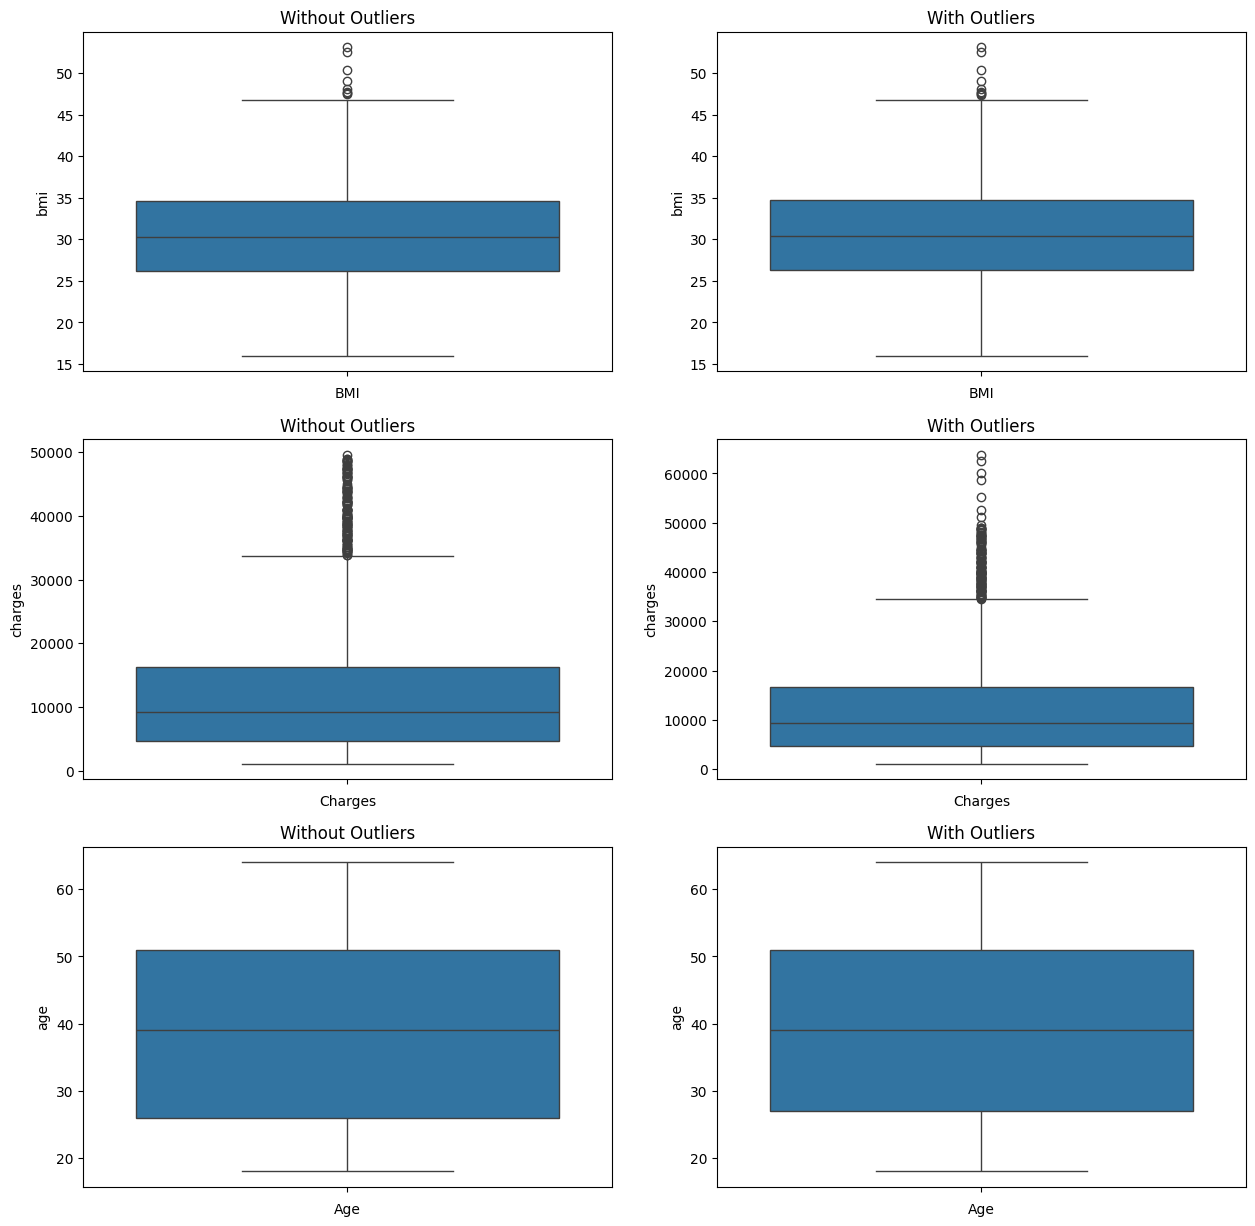

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1331 rows x 7 columns]


In [147]:
remove_outliers(df)

ish


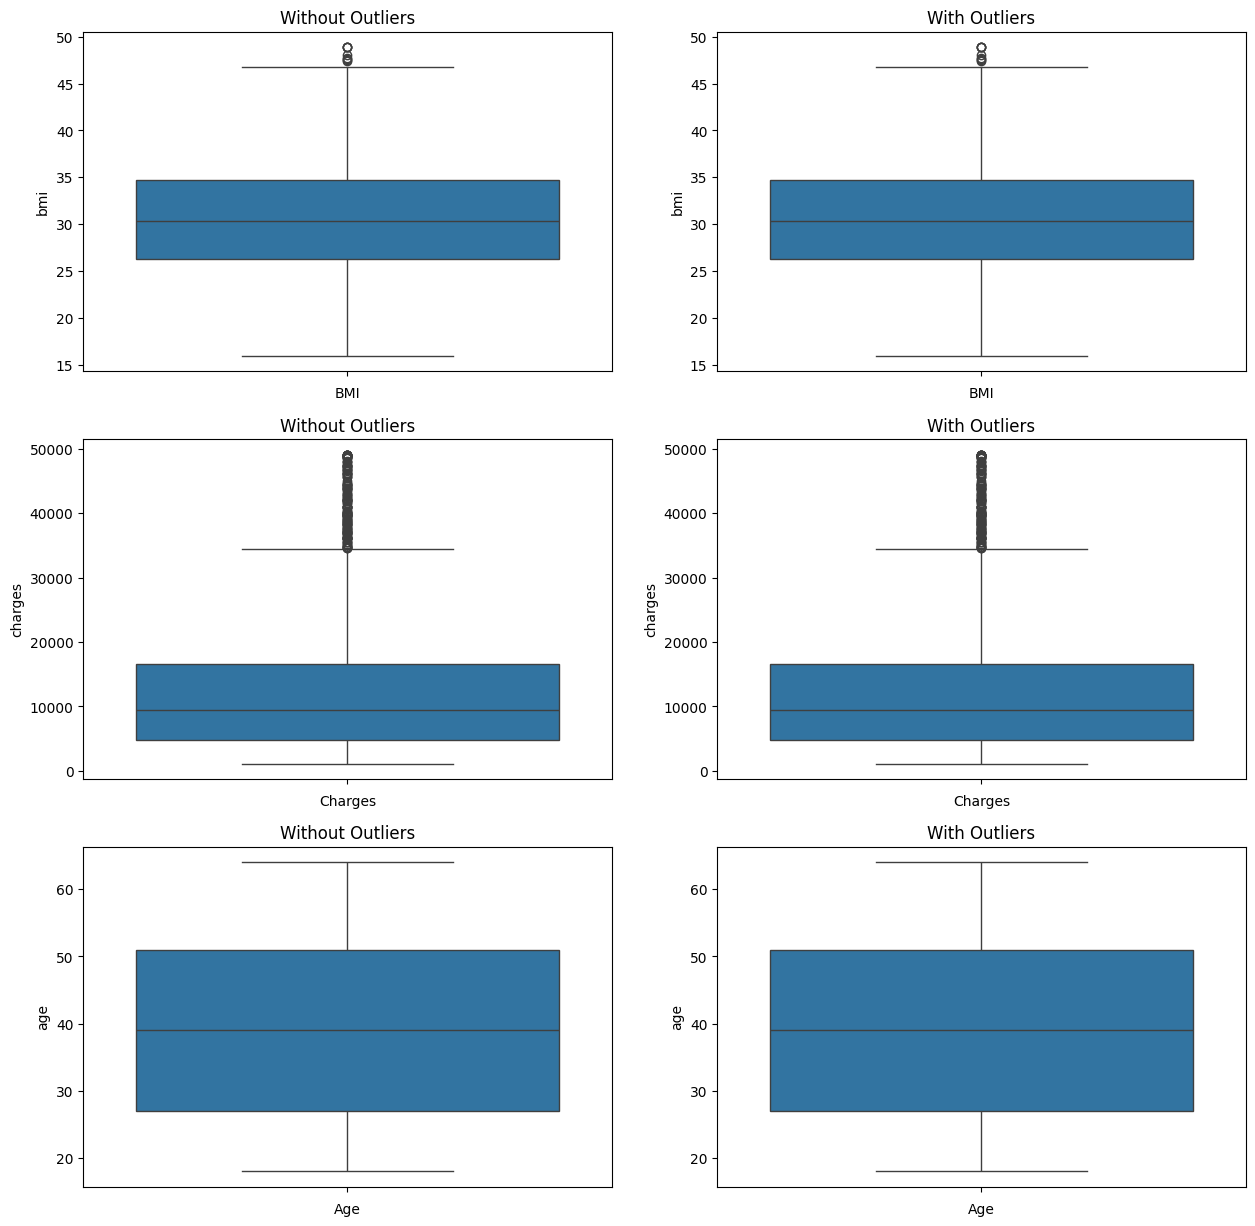

17695070.397004873


In [155]:
change_outliers(df)

In [152]:
df['charges'].sum()

np.float64(17695315.222712718)